In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

In [ ]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\Iris.csv")

In [ ]:
print("First five rows of the dataset:\n", dataset.head())

In [9]:
print("\nSummary statistics:\n", dataset.describe())


Summary statistics:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [13]:
dataset.columns = ['ID', 'Sepal Length Cm', 'Sepal Width Cm', 'Petal Length Cm', 'Petal Width Cm', 'Species']

In [15]:
print("\nSummary statistics:\n", dataset.describe())


Summary statistics:
                ID  Sepal Length Cm  Sepal Width Cm  Petal Length Cm  \
count  150.000000       150.000000      150.000000       150.000000   
mean    75.500000         5.843333        3.054000         3.758667   
std     43.445368         0.828066        0.433594         1.764420   
min      1.000000         4.300000        2.000000         1.000000   
25%     38.250000         5.100000        2.800000         1.600000   
50%     75.500000         5.800000        3.000000         4.350000   
75%    112.750000         6.400000        3.300000         5.100000   
max    150.000000         7.900000        4.400000         6.900000   

       Petal Width Cm  
count      150.000000  
mean         1.198667  
std          0.763161  
min          0.100000  
25%          0.300000  
50%          1.300000  
75%          1.800000  
max          2.500000  


In [45]:
species_mapping = {species: idx for idx, species in enumerate(dataset['Species'].unique())}
dataset['Species'] = dataset['Species'].map(species_mapping)

In [51]:
dataset_for_pairplot = dataset.drop(['ID'], axis=1) 

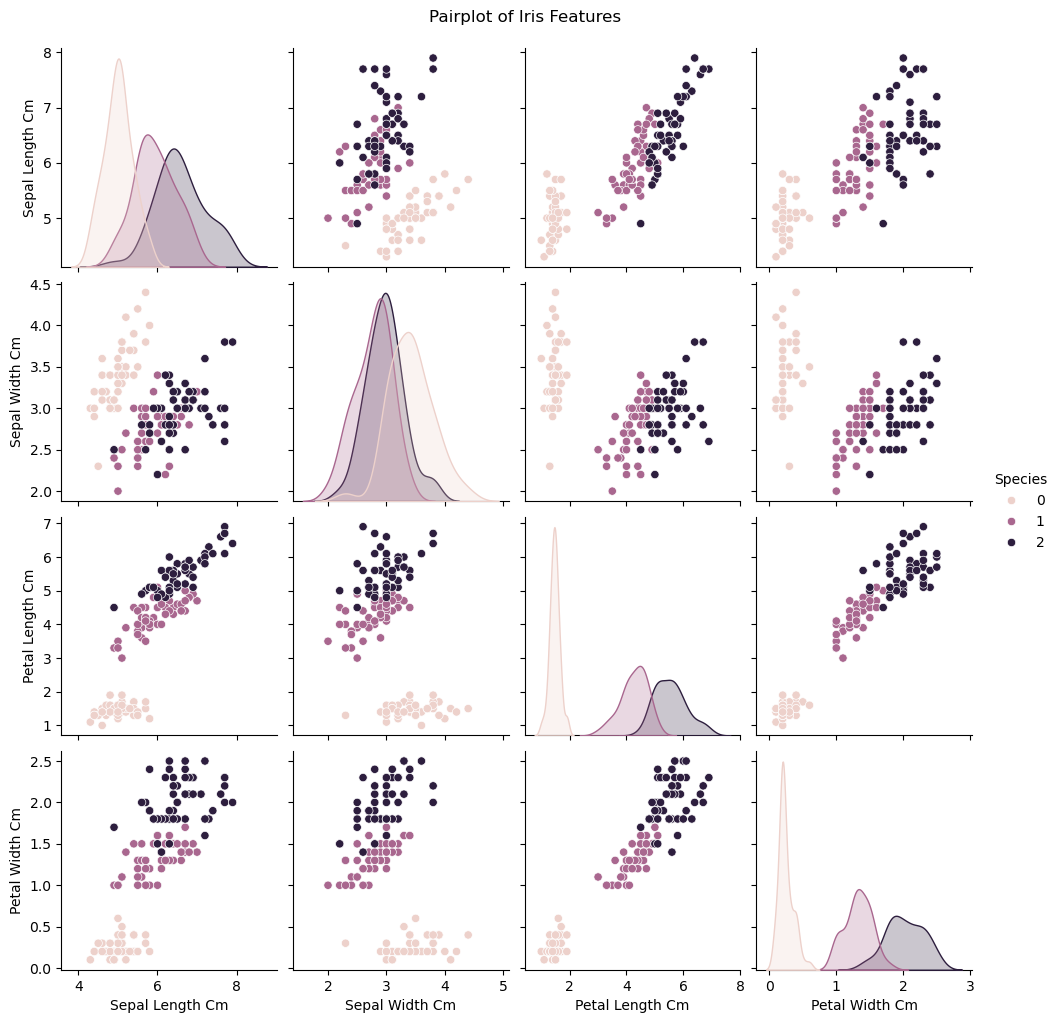

In [53]:
sns.pairplot(dataset_for_pairplot, hue='Species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

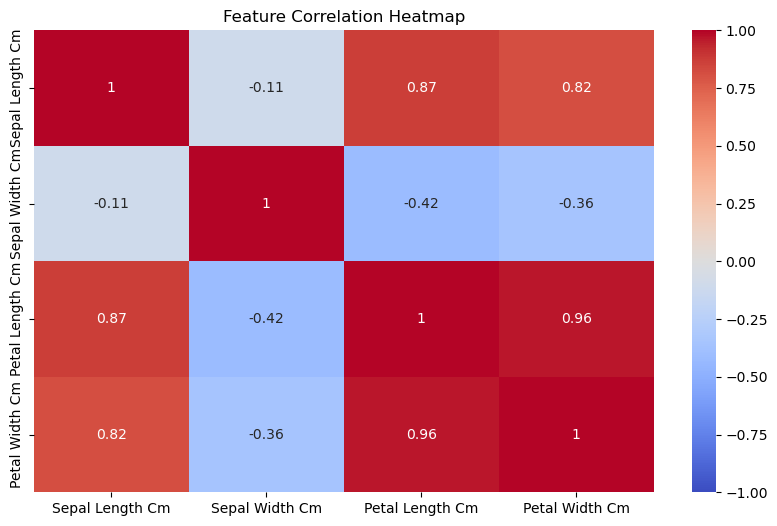

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.drop(['ID', 'Species'], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

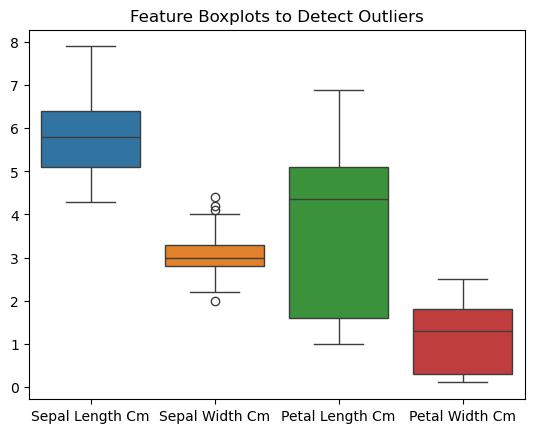

In [59]:
sns.boxplot(data=dataset.drop(['ID', 'Species'], axis=1))
plt.title('Feature Boxplots to Detect Outliers')
plt.show()

In [63]:
X = dataset[['Sepal Length Cm', 'Sepal Width Cm', 'Petal Length Cm', 'Petal Width Cm']]
y = dataset['Species']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True)
}

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"\n{model_name}:\nAccuracy Score: {acc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression:
Accuracy Score: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Decision Tree:
Accuracy Score: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45


K-Nearest Neighbors:
Accuracy Score: 0.9111111111111111
Classification Report:
  

In [79]:
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"{model_name} Cross-validation Mean Accuracy: {cv_scores.mean():.3f}")

SVC Cross-validation Mean Accuracy: 0.971


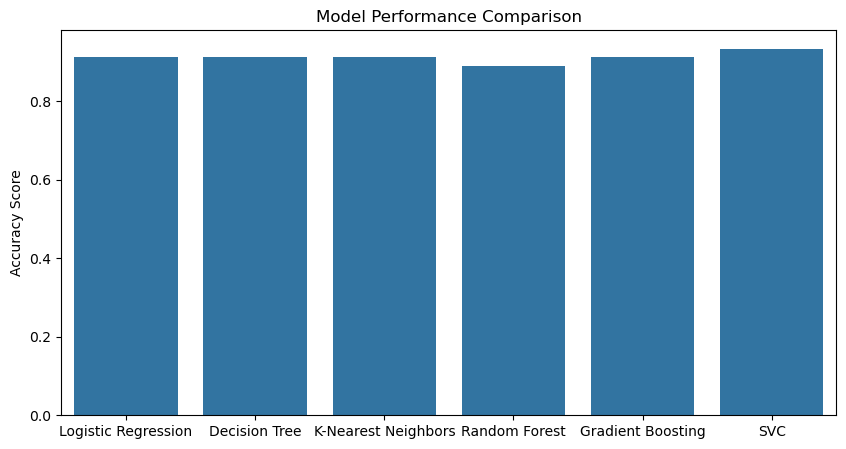

In [81]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

In [83]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nBest parameters found for Decision Tree:", grid_search.best_params_)


Best parameters found for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


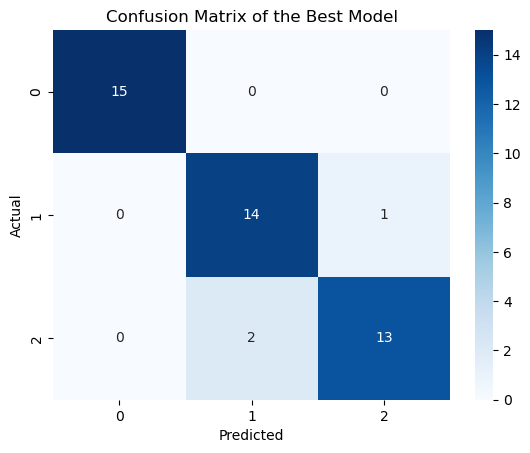

In [85]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Best Model')
plt.show()

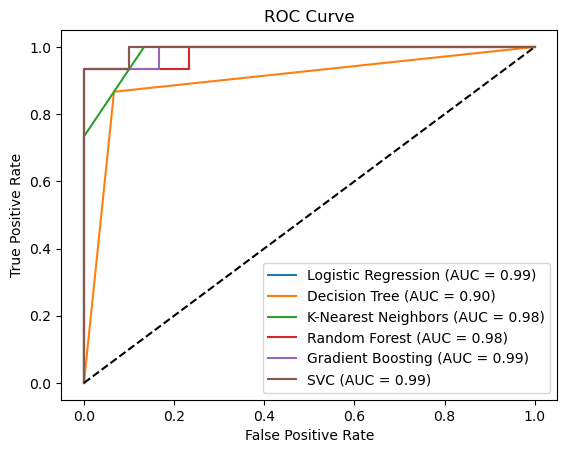

In [137]:
plt.figure()
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()